In [2]:
import numpy as np
import pandas as pd
import seaborn as sns


from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVC
from sklearn import metrics

import joblib
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
data = pd.read_csv('../input/nslkdd/KDDTrain+.txt', header=None)

columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 
           'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 
           'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 
           'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 
           'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 
           'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 
           'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 
           'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 
           'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 
           'attack', 'level']

data.columns = columns

data = data.drop('level', axis=1)

print(data.tail())

        duration protocol_type   service flag  src_bytes  dst_bytes  land  \
125968         0           tcp   private   S0          0          0     0   
125969         8           udp   private   SF        105        145     0   
125970         0           tcp      smtp   SF       2231        384     0   
125971         0           tcp    klogin   S0          0          0     0   
125972         0           tcp  ftp_data   SF        151          0     0   

        wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
125968               0       0    0  ...                  25   
125969               0       0    0  ...                 244   
125970               0       0    0  ...                  30   
125971               0       0    0  ...                   8   
125972               0       0    0  ...                  77   

        dst_host_same_srv_rate  dst_host_diff_srv_rate  \
125968                    0.10                    0.06   
125969                    0.96      

In [4]:
data.describe().style.background_gradient(cmap='Blues').set_properties(**{'font-family':'Segoe UI'})

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.144650,45566.743000,19779.114421,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,0.001342,0.001103,0.302192,0.012669,0.000413,0.004096,0.000000,0.000008,0.009423,84.107555,27.737888,0.284485,0.282485,0.119958,0.121183,0.660928,0.063053,0.097322,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.515310,5870331.181894,4021269.151441,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,0.036603,0.045154,24.399618,0.483935,0.022181,0.099370,0.000000,0.002817,0.096612,114.508607,72.635840,0.446456,0.447022,0.320436,0.323647,0.439623,0.180314,0.259830,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,276.000000,516.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.000000,1379963888.000000,1309937401.000000,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.000000,1.000000,1.000000,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
data_test=pd.read_csv('../input/nslkdd/KDDTrain+.txt')
data_test.columns = columns
data_test = data_test.drop('level', axis=1)
data_test.tail()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack
125967,0,tcp,private,S0,0,0,0,0,0,0,...,25,0.10,0.06,0.00,0.0,1.00,1.0,0.00,0.0,neptune
125968,8,udp,private,SF,105,145,0,0,0,0,...,244,0.96,0.01,0.01,0.0,0.00,0.0,0.00,0.0,normal
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,30,0.12,0.06,0.00,0.0,0.72,0.0,0.01,0.0,normal
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,8,0.03,0.05,0.00,0.0,1.00,1.0,0.00,0.0,neptune
125971,0,tcp,ftp_data,SF,151,0,0,0,0,0,...,77,0.30,0.03,0.30,0.0,0.00,0.0,0.00,0.0,normal


In [6]:
data['attack'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [8]:
data["attack"] = np.where(data["attack"] != "normal", 'attack','normal')
data_test["attack"] = np.where(data_test["attack"] != "normal", 'attack','normal')

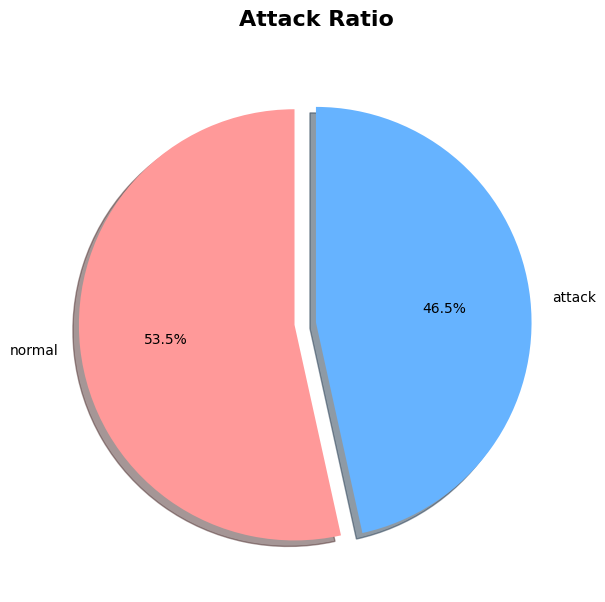

In [9]:
colors = ['#ff9999','#66b3ff']

plt.figure(figsize=(10, 7))

r = data['attack'].value_counts().plot(kind='pie', explode=(0.1, 0), startangle=90, autopct='%1.1f%%', colors=colors, shadow=True)
plt.gca().set_ylabel('') 
plt.title('Attack Ratio', pad=20, fontdict={'fontsize': 16, 'fontweight': 'bold'})

plt.show()

In [10]:
le = LabelEncoder()
data['protocol_type']=le.fit_transform(data['protocol_type'])
data['service']=le.fit_transform(data['service'])
data['flag']=le.fit_transform(data['flag'])

data['attack']=le.fit_transform(data['attack'])

data_test['protocol_type']=le.fit_transform(data_test['protocol_type'])
data_test['service']=le.fit_transform(data_test['service'])
data_test['flag']=le.fit_transform(data_test['flag'])

data_test['attack']=le.fit_transform(data_test['attack'])

In [12]:
def evaluate_model_performance(x_training_data, y_training_data, classifier):
    scores = cross_val_score(estimator=classifier, X=x_training_data, y=y_training_data, cv=5)
    return scores.mean()

def train_model_and_calculate_accuracy(classifier, x_training, x_validation, y_training, y_validation):
    classifier.fit(x_training, y_training)
    
    predictions = classifier.predict(x_validation)
    average_accuracy = evaluate_model_performance(x_training, y_training, classifier)
    
    return average_accuracy

def execute_model_analysis(classifier, x_training, x_validation, y_training, y_validation):
    classifier.fit(x_training, y_training)
    predictions = classifier.predict(x_validation)
    print("Coefficient of Determination:", r2_score(y_validation, predictions))
    print("Mean Absolute Error:", mean_absolute_error(y_validation, predictions))
    print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_validation, predictions)))
    detailed_report = classification_report(y_validation, predictions)
    print(detailed_report)


In [13]:
x = data.drop(['attack'], axis=1).values
y = data['attack'].values

In [14]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)

In [16]:
x_train.shape, x_test.shape

((100778, 41), (25195, 41))

In [ ]:
xl_test = data_test.drop(['attack'], axis=1).values
yl_test = data_test['attack'].values
scaler = MinMaxScaler()
xl_test = scaler.fit_transform(xl_test)

In [ ]:
x_traincpy = np.copy(x_train)
y_traincpy = np.copy(y_train)
x_testcpy = np.copy(x_test)
y_testcpy = np.copy(y_test)

logr = LogisticRegression()
logr_cross = fit_and_evaluate(logr, x_traincpy , x_testcpy , y_traincpy , y_testcpy)

print('Logistic Regression Performance on the validatoin set: Cross Validation Score = %0.4f' % logr_cross)

In [ ]:
xl_testcpy = np.copy(xl_test)
yl_testcpy = np.copy(yl_test)

y_pred = logr.predict(xl_testcpy)
print("Accuracy on test dataset: ", accuracy_score(yl_testcpy, y_pred))

In [ ]:
cm = confusion_matrix(yl_testcpy, y_pred, labels=logr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logr.classes_)
disp.plot()
plt.show()

In [ ]:
x_traincpy = np.copy(x_train)
y_traincpy = np.copy(y_train)
x_testcpy = np.copy(x_test)
y_testcpy = np.copy(y_test)

random = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
random_cross = fit_and_evaluate(random, x_traincpy , x_testcpy , y_traincpy , y_testcpy)

print('Random Forest Performance on the validation set: Cross Validation Score = %0.4f' % random_cross)

In [ ]:
xl_testcpy = np.copy(xl_test)
yl_testcpy = np.copy(yl_test)

y_pred = random.predict(xl_testcpy)
print("Accuracy on test: ", accuracy_score(yl_testcpy, y_pred))

In [ ]:
cm = confusion_matrix(yl_testcpy, y_pred, labels=random.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random.classes_)
disp.plot()
plt.show()

In [ ]:
x_traincpy = np.copy(x_train)
y_traincpy = np.copy(y_train)
x_testcpy = np.copy(x_test)
y_testcpy = np.copy(y_test)

DT=DecisionTreeClassifier()
DT_cross = fit_and_evaluate(DT, x_traincpy , x_testcpy , y_traincpy , y_testcpy)

print('Decision Tree Performance on the validation set: Cross Validation Score = %0.4f' % DT_cross)

In [ ]:
xl_testcpy = np.copy(xl_test)
yl_testcpy = np.copy(yl_test)

y_pred = DT.predict(xl_testcpy)
print("Accuracy on test dataset: ", accuracy_score(yl_testcpy, y_pred))

In [ ]:
cm = confusion_matrix(yl_testcpy, y_pred, labels=DT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DT.classes_)
disp.plot()
plt.show()

In [ ]:
x_traincpy = np.copy(x_train)
y_traincpy = np.copy(y_train)
x_testcpy = np.copy(x_test)
y_testcpy = np.copy(y_test)

knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_cross = fit_and_evaluate(knn, x_traincpy , x_testcpy , y_traincpy , y_testcpy)

print('KNN Performance on the validation dataset: Cross Validation Score = %0.4f' % knn_cross)

In [ ]:
xl_testcpy = np.copy(xl_test)
yl_testcpy = np.copy(yl_test)

y_pred = knn.predict(xl_testcpy)
print("Accuracy on test dataset: ", accuracy_score(yl_testcpy, y_pred))

In [ ]:
cm = confusion_matrix(yl_testcpy, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

In [ ]:
plt.figure(figsize = (25,8))
u = sns.boxplot(palette = 'cool', data=data)
u.set_xticklabels(u.get_xticklabels(),rotation=90);

In [ ]:
fig = px.box(data, y='dst_bytes')
fig.show()

In [ ]:
fig = px.box(data, y='src_bytes')
fig.show()

In [ ]:
data = data.drop(data[data['dst_bytes']>1500].index)
data = data.drop(data[data['src_bytes']>750].index)

In [ ]:
plt.figure(figsize = (25,8))
u = sns.boxplot(palette = 'cool', data=data_test)
u.set_xticklabels(u.get_xticklabels(),rotation=90);

In [ ]:
fig = px.box(data_test, y='dst_bytes')
fig.show()

In [ ]:
data_test = data_test.drop(data_test[data_test['dst_bytes'] >1750].index)
data_test = data_test.drop(data_test[data_test['src_bytes'] > 717].index)

In [ ]:
x_wo = data.drop(['attack'], axis=1).values
y_wo = data['attack'].values

In [ ]:
# scaling the dataset.
ro_scaler = RobustScaler()
x_wo_scaled = ro_scaler.fit_transform(x_wo)

scaler = MinMaxScaler()
x_wo_scaled = scaler.fit_transform(x_wo_scaled)

In [ ]:
x_wo_train , x_wo_test , y_wo_train , y_wo_test = train_test_split(x_wo_scaled, y_wo, test_size= 0.2 , random_state=42)

In [ ]:
x_wo_train.shape, x_wo_test.shape

In [ ]:
xl_wo_test = data_test.drop(['attack'], axis=1).values
yl_wo_test = data_test['attack'].values
scaler = MinMaxScaler()
xl_wo_test = scaler.fit_transform(xl_wo_test)

In [ ]:
x_traincpy = np.copy(x_wo_train)
y_traincpy = np.copy(y_wo_train)
x_testcpy = np.copy(x_wo_test)
y_testcpy = np.copy(y_wo_test)

logr = LogisticRegression()
logr_cross = fit_and_evaluate(logr, x_traincpy , x_testcpy , y_traincpy , y_testcpy)

print('Logistic Regression Performance on the test set: Cross Validation Score = %0.4f' % logr_cross)

In [ ]:
xl_testcpy = np.copy(xl_wo_test)
yl_testcpy = np.copy(yl_wo_test)

model = LogisticRegression()
run_experiment(model, x_traincpy , xl_testcpy , y_traincpy , yl_testcpy)

In [ ]:
y_pred = logr.predict(xl_testcpy)
print("Accuracy: ", accuracy_score(yl_testcpy, y_pred))

In [ ]:
cm = confusion_matrix(yl_testcpy, y_pred, labels=logr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logr.classes_)
disp.plot()
plt.show()

In [ ]:
fpr, tpr, _ = roc_curve(yl_testcpy,y_pred)
auc = roc_auc_score(yl_testcpy, y_pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
x_traincpy = np.copy(x_wo_train)
y_traincpy = np.copy(y_wo_train)
x_testcpy = np.copy(x_wo_test)
y_testcpy = np.copy(y_wo_test)

random = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
random_cross = fit_and_evaluate(random, x_traincpy , x_testcpy , y_traincpy , y_testcpy)

print('Random Forest Performance on the test set: Cross Validation Score = %0.4f' % random_cross)

In [ ]:
xl_testcpy = np.copy(xl_wo_test)
yl_testcpy = np.copy(yl_wo_test)

y_pred = random.predict(xl_testcpy)
print("Accuracy: ", accuracy_score(yl_testcpy, y_pred))

In [ ]:
class_report = classification_report(yl_testcpy, y_pred)
print("Classification Report:")
print(class_report)

In [ ]:
cm = confusion_matrix(yl_testcpy, y_pred, labels=random.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random.classes_)
disp.plot()
plt.show()

In [ ]:
fpr, tpr, _ = roc_curve(yl_testcpy,y_pred)
auc = roc_auc_score(yl_testcpy, y_pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
x_traincpy = np.copy(x_wo_train)
y_traincpy = np.copy(y_wo_train)
x_testcpy = np.copy(x_wo_test)
y_testcpy = np.copy(y_wo_test)

knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_cross = fit_and_evaluate(knn, x_traincpy , x_testcpy , y_traincpy , y_testcpy)

print('KNN Performance on the validation dataset: Cross Validation Score = %0.4f' % knn_cross)

In [ ]:
xl_testcpy = np.copy(xl_wo_test)
yl_testcpy = np.copy(yl_wo_test)

y_pred = knn.predict(xl_testcpy)
print("Accuracy on test dataset: ", accuracy_score(yl_testcpy, y_pred))

In [ ]:
class_report = classification_report(yl_testcpy, y_pred)
print("Classification Report:")
print(class_report)

In [ ]:
cm = confusion_matrix(yl_testcpy, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot()
plt.show()

In [ ]:
fpr, tpr, _ = roc_curve(yl_testcpy,y_pred)
auc = roc_auc_score(yl_testcpy, y_pred)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [ ]:
joblib.dump(model, 'mlmodels.pkl')